In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [2]:
file_path = 'acc.txt'

# Reading the data into a pandas DataFrame
# Assuming the columns are X, Y, Z accelerations and separated by tabs
data = pd.read_csv(file_path, sep='\t', header=None, names=['X', 'Y', 'Z'])

# Displaying the first few rows of the dataframe
data.head()

,X,Y,Z
0,-0.41,0.9,-0.06
1,-0.40,0.9,-0.06
2,-0.40,0.9,-0.06
3,-0.40,0.9,-0.06
4,-0.40,0.9,-0.05


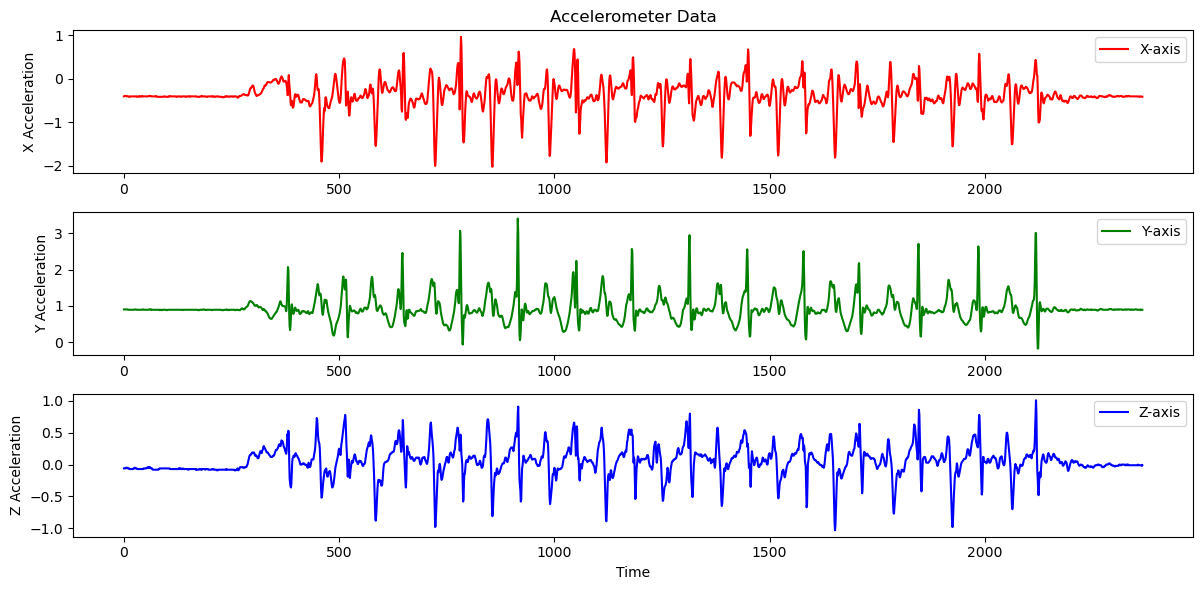

In [3]:
# Plotting the accelerometer data
plt.figure(figsize=(12, 6))

# Plotting each axis
plt.subplot(3, 1, 1)
plt.plot(data['X'], label='X-axis', color='r')
plt.ylabel('X Acceleration')
plt.title('Accelerometer Data')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Y'], label='Y-axis', color='g')
plt.ylabel('Y Acceleration')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Z'], label='Z-axis', color='b')
plt.ylabel('Z Acceleration')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

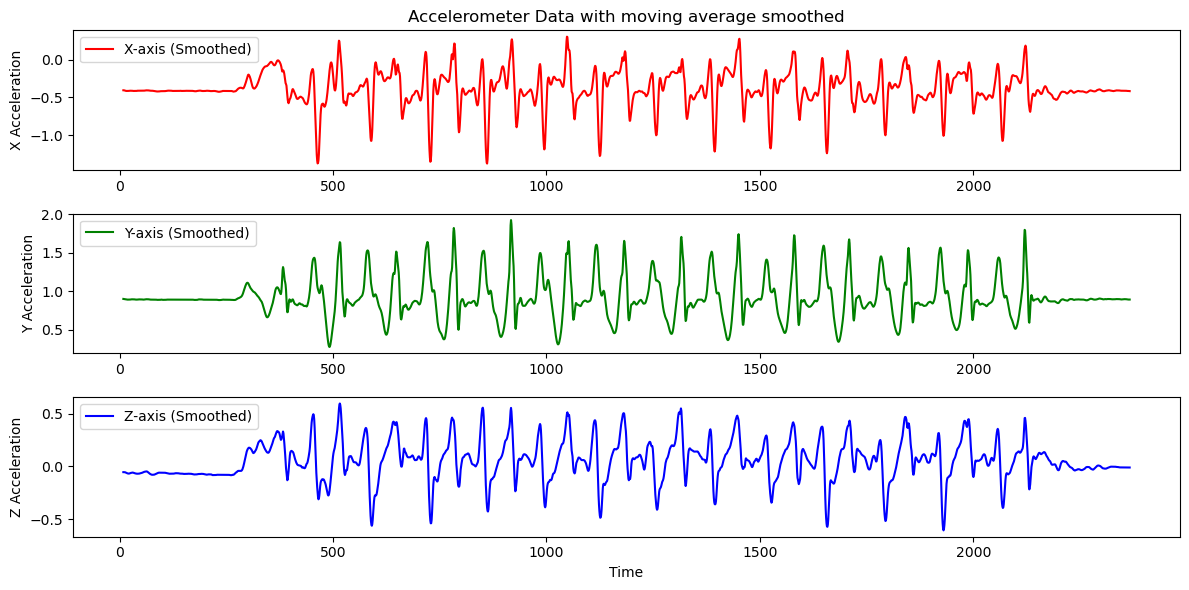

In [4]:
# Applying a moving average to smooth the data
window_size = 10  # Defining the window size for the moving average
data_smoothed = data.rolling(window=window_size).mean()

# Plotting the smoothed accelerometer data
plt.figure(figsize=(12, 6))

# Plotting each axis with smoothed data
plt.subplot(3, 1, 1)
plt.plot(data_smoothed['X'], label='X-axis (Smoothed)', color='r')
plt.ylabel('X Acceleration')
plt.title('Accelerometer Data with moving average smoothed')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data_smoothed['Y'], label='Y-axis (Smoothed)', color='g')
plt.ylabel('Y Acceleration')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data_smoothed['Z'], label='Z-axis (Smoothed)', color='b')
plt.ylabel('Z Acceleration')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

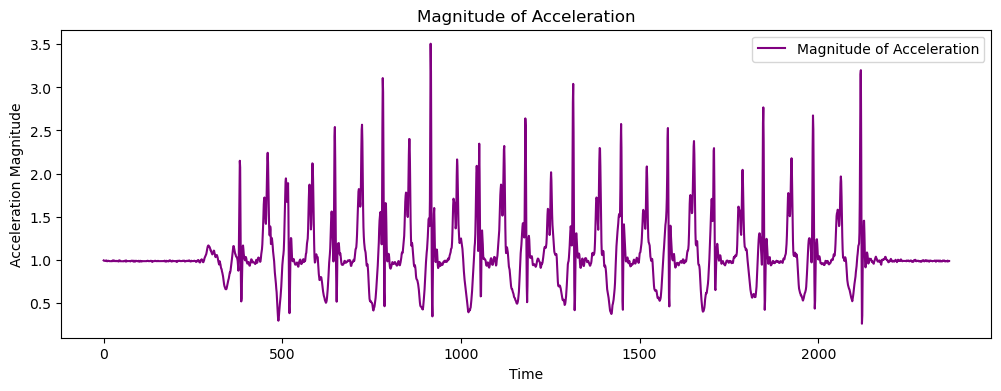

50

In [5]:
# Calculating the magnitude of acceleration
data['Magnitude'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)

# Plotting the magnitude of acceleration
plt.figure(figsize=(12, 4))
plt.plot(data['Magnitude'], label='Magnitude of Acceleration', color='purple')
plt.ylabel('Acceleration Magnitude')
plt.xlabel('Time')
plt.title('Magnitude of Acceleration')
plt.legend()
plt.show()

# Detecting peaks - this is a basic approach and might need fine-tuning
peaks, _ = find_peaks(data['Magnitude'], height=np.mean(data['Magnitude']) + 1 * np.std(data['Magnitude']))

# Counting the number of steps
num_steps = len(peaks)
num_steps

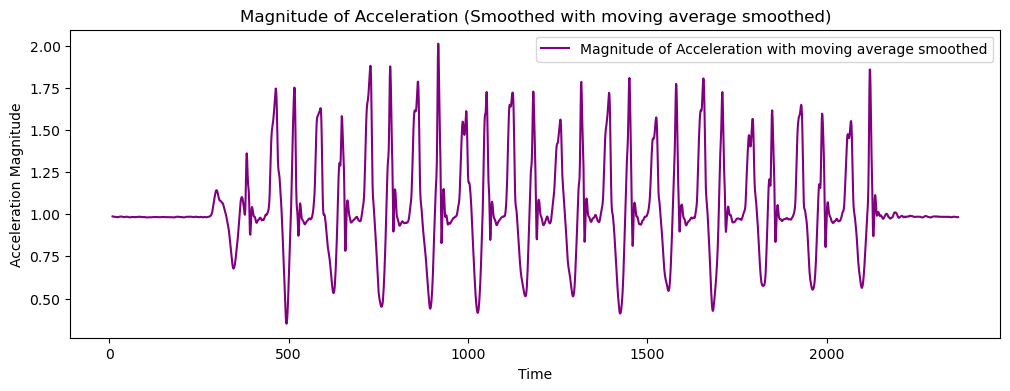

34

In [6]:
# Calculating the magnitude of acceleration for the smoothed data
data_smoothed['Magnitude'] = np.sqrt(data_smoothed['X']**2 + data_smoothed['Y']**2 + data_smoothed['Z']**2)

# Plotting the magnitude of acceleration for the smoothed data
plt.figure(figsize=(12, 4))
plt.plot(data_smoothed['Magnitude'], label='Magnitude of Acceleration with moving average smoothed', color='purple')
plt.ylabel('Acceleration Magnitude')
plt.xlabel('Time')
plt.title('Magnitude of Acceleration (Smoothed with moving average smoothed)')
plt.legend()
plt.show()

# Detecting peaks in the smoothed data
peaks_smoothed, _ = find_peaks(data_smoothed['Magnitude'], height=np.mean(data_smoothed['Magnitude']) + 1 * np.std(data_smoothed['Magnitude']))

# Counting the number of steps in the smoothed data
num_steps_smoothed = len(peaks_smoothed)
num_steps_smoothed

In [7]:
# Redetecting peaks and troughs (minima) without the threshold
peaks = find_peaks(data_smoothed['Magnitude'])[0]
troughs = find_peaks(-data_smoothed['Magnitude'])[0]

# Extracting the acceleration values for peaks and troughs
peak_accelerations = data_smoothed['Magnitude'].iloc[peaks].values
trough_accelerations = data_smoothed['Magnitude'].iloc[troughs].values

# Creating a DataFrame for peaks and troughs
peaks_and_troughs_info = pd.DataFrame({
    'Type': ['Peak']*len(peaks) + ['Trough']*len(troughs),
    'Index': np.concatenate((peaks, troughs)),
    'Acceleration': np.concatenate((peak_accelerations, trough_accelerations))
})

# Sorting the DataFrame by index to maintain the time order
peaks_and_troughs_info = peaks_and_troughs_info.sort_values(by='Index').reset_index(drop=True)
peaks_and_troughs_info


,Type,Index,Acceleration
0,Trough,13,0.985618
1,Peak,14,0.985658
2,Trough,18,0.983374
3,Peak,21,0.983580
4,Trough,24,0.982186
...,...,...,...
284,Trough,2346,0.981766
285,Peak,2349,0.983583
286,Trough,2351,0.983583
287,Peak,2353,0.985401


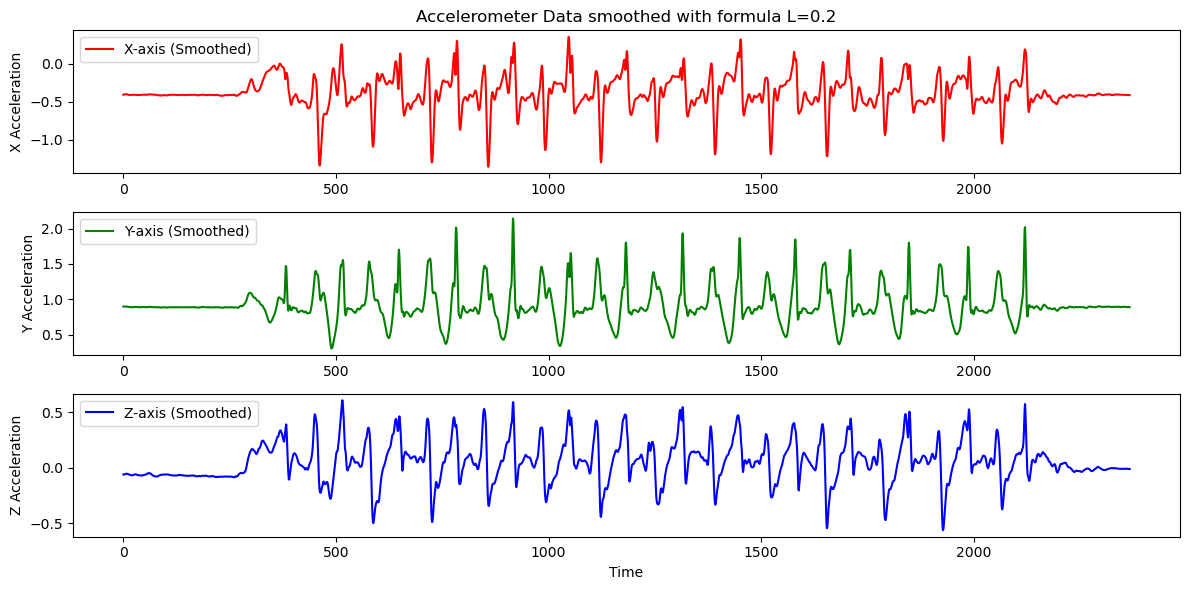

In [8]:
# Applying the specified smoothing formula to the data

L = 0.2  # Smoothing factor

# Function to apply the smoothing formula
def apply_smoothing(data, L):
    smoothed = [data[0]]  # Initialize with the first data point
    for k in range(1, len(data)):
        smoothed_value = smoothed[-1] + L * (data[k] - smoothed[-1])
        smoothed.append(smoothed_value)
    return smoothed

# Applying smoothing to each axis
data['X_smoothed'] = apply_smoothing(data['X'], L)
data['Y_smoothed'] = apply_smoothing(data['Y'], L)
data['Z_smoothed'] = apply_smoothing(data['Z'], L)

# Plotting the smoothed accelerometer data
plt.figure(figsize=(12, 6))

# Plotting each axis with smoothed data
plt.subplot(3, 1, 1)
plt.plot(data['X_smoothed'], label='X-axis (Smoothed)', color='r')
plt.ylabel('X Acceleration')
plt.title(f'Accelerometer Data smoothed with formula L={L}')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Y_smoothed'], label='Y-axis (Smoothed)', color='g')
plt.ylabel('Y Acceleration')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Z_smoothed'], label='Z-axis (Smoothed)', color='b')
plt.ylabel('Z Acceleration')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

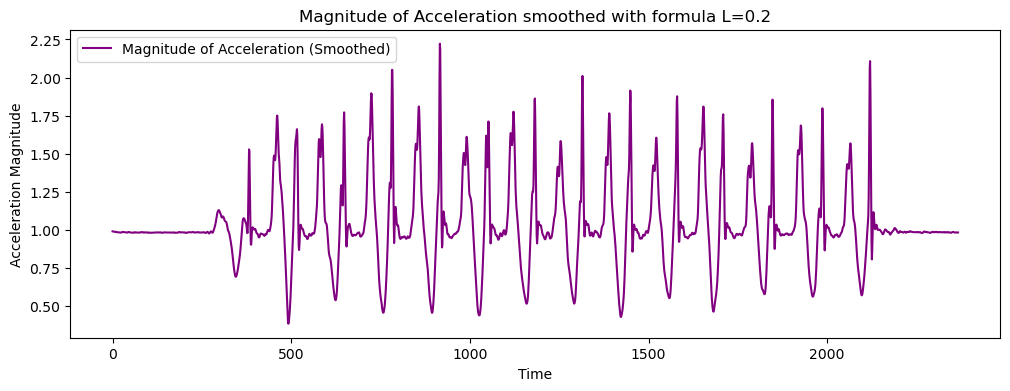

In [9]:
# Calculating the magnitude of acceleration for the smoothed data
data['Magnitude_smoothed'] = np.sqrt(data['X_smoothed']**2 + data['Y_smoothed']**2 + data['Z_smoothed']**2)

# Plotting the magnitude of acceleration for the smoothed data
plt.figure(figsize=(12, 4))
plt.plot(data['Magnitude_smoothed'], label='Magnitude of Acceleration (Smoothed)', color='purple')
plt.ylabel('Acceleration Magnitude')
plt.xlabel('Time')
plt.title(f'Magnitude of Acceleration smoothed with formula L={L}')
plt.legend()
plt.show()

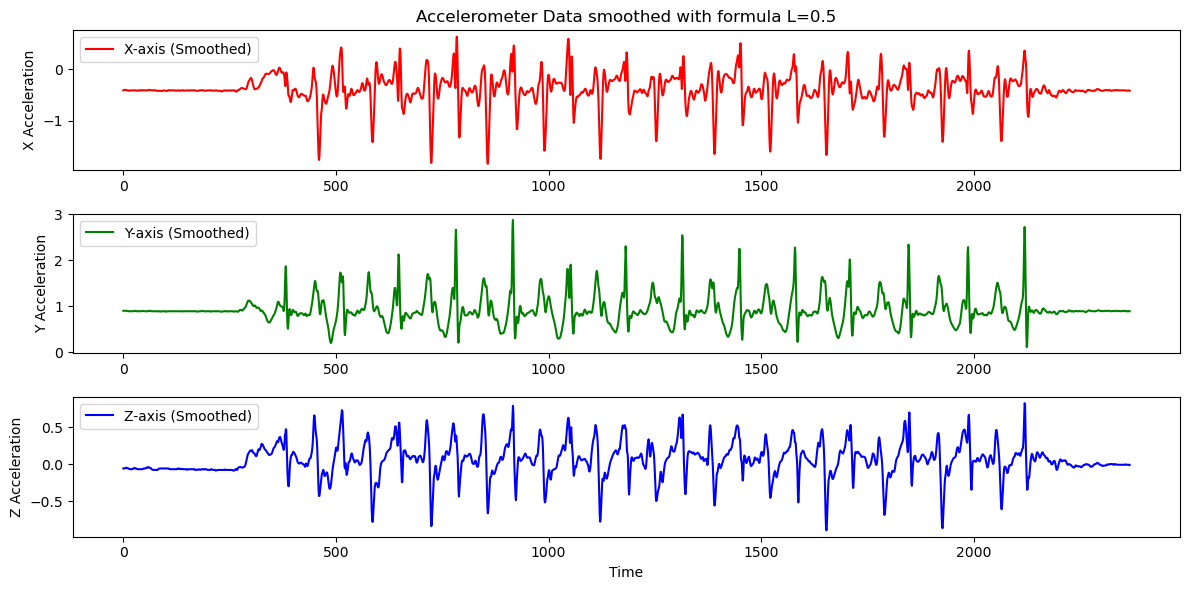

In [10]:
# Applying the specified smoothing formula to the data

L = 0.5  # Smoothing factor

# Function to apply the smoothing formula
def apply_smoothing(data, L):
    smoothed = [data[0]]  # Initialize with the first data point
    for k in range(1, len(data)):
        smoothed_value = smoothed[-1] + L * (data[k] - smoothed[-1])
        smoothed.append(smoothed_value)
    return smoothed

# Applying smoothing to each axis
data['X_smoothed'] = apply_smoothing(data['X'], L)
data['Y_smoothed'] = apply_smoothing(data['Y'], L)
data['Z_smoothed'] = apply_smoothing(data['Z'], L)

# Plotting the smoothed accelerometer data
plt.figure(figsize=(12, 6))

# Plotting each axis with smoothed data
plt.subplot(3, 1, 1)
plt.plot(data['X_smoothed'], label='X-axis (Smoothed)', color='r')
plt.ylabel('X Acceleration')
plt.title(f'Accelerometer Data smoothed with formula L={L}')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Y_smoothed'], label='Y-axis (Smoothed)', color='g')
plt.ylabel('Y Acceleration')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Z_smoothed'], label='Z-axis (Smoothed)', color='b')
plt.ylabel('Z Acceleration')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

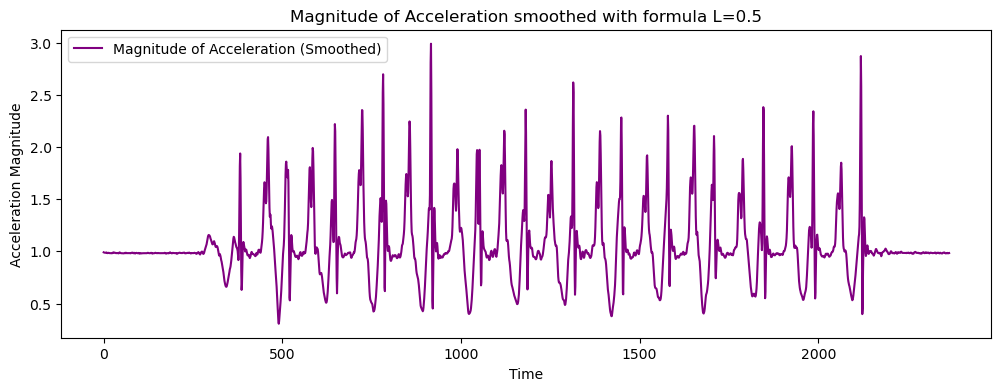

In [11]:
# Calculating the magnitude of acceleration for the smoothed data
data['Magnitude_smoothed'] = np.sqrt(data['X_smoothed']**2 + data['Y_smoothed']**2 + data['Z_smoothed']**2)

# Plotting the magnitude of acceleration for the smoothed data
plt.figure(figsize=(12, 4))
plt.plot(data['Magnitude_smoothed'], label='Magnitude of Acceleration (Smoothed)', color='purple')
plt.ylabel('Acceleration Magnitude')
plt.xlabel('Time')
plt.title(f'Magnitude of Acceleration smoothed with formula L={L}')
plt.legend()
plt.show()

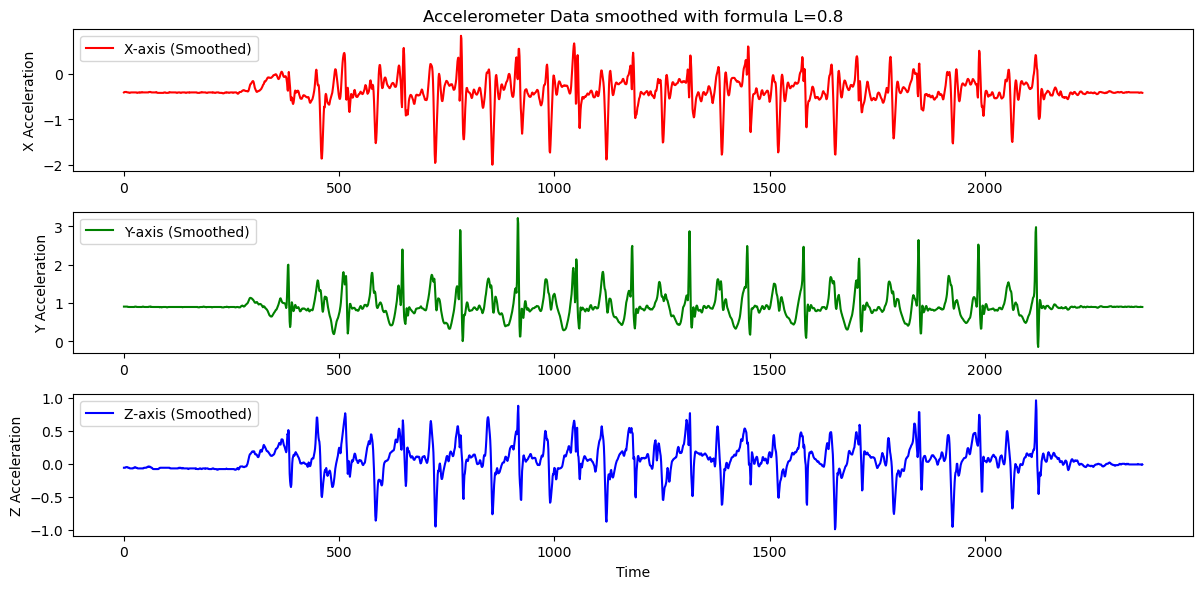

In [12]:
# Applying the specified smoothing formula to the data

L = 0.8  # Smoothing factor

# Function to apply the smoothing formula
def apply_smoothing(data, L):
    smoothed = [data[0]]  # Initialize with the first data point
    for k in range(1, len(data)):
        smoothed_value = smoothed[-1] + L * (data[k] - smoothed[-1])
        smoothed.append(smoothed_value)
    return smoothed

# Applying smoothing to each axis
data['X_smoothed'] = apply_smoothing(data['X'], L)
data['Y_smoothed'] = apply_smoothing(data['Y'], L)
data['Z_smoothed'] = apply_smoothing(data['Z'], L)

# Plotting the smoothed accelerometer data
plt.figure(figsize=(12, 6))

# Plotting each axis with smoothed data
plt.subplot(3, 1, 1)
plt.plot(data['X_smoothed'], label='X-axis (Smoothed)', color='r')
plt.ylabel('X Acceleration')
plt.title(f'Accelerometer Data smoothed with formula L={L}')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Y_smoothed'], label='Y-axis (Smoothed)', color='g')
plt.ylabel('Y Acceleration')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Z_smoothed'], label='Z-axis (Smoothed)', color='b')
plt.ylabel('Z Acceleration')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()

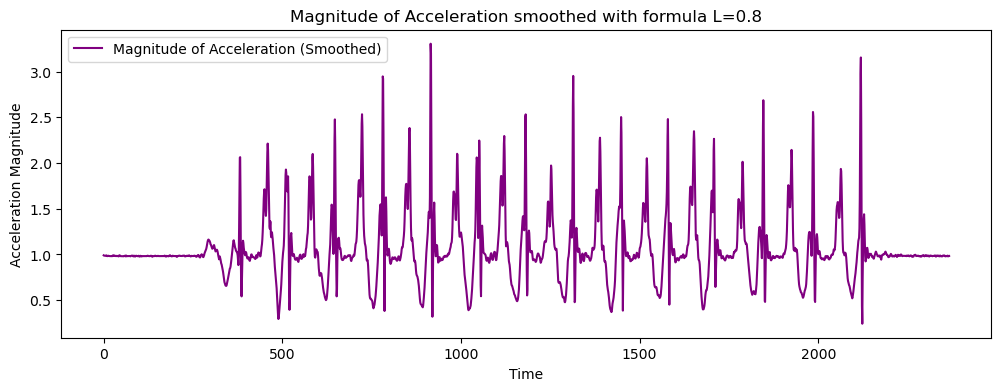

In [13]:
# Calculating the magnitude of acceleration for the smoothed data
data['Magnitude_smoothed'] = np.sqrt(data['X_smoothed']**2 + data['Y_smoothed']**2 + data['Z_smoothed']**2)

# Plotting the magnitude of acceleration for the smoothed data
plt.figure(figsize=(12, 4))
plt.plot(data['Magnitude_smoothed'], label='Magnitude of Acceleration (Smoothed)', color='purple')
plt.ylabel('Acceleration Magnitude')
plt.xlabel('Time')
plt.title(f'Magnitude of Acceleration smoothed with formula L={L}')
plt.legend()
plt.show()